## Detección de Bordes
- Estudiante: Lenin G. Falconí
- Fecha: 2024-10-14

### Objetivo
El objetivo de esta actividad es explorar cómo diferentes filtros de imagen afectan una imagen dada. Utilizarán el código de Python proporcionado para cargar una imagen y aplicarle varios filtros. Luego, observarán y describirán los efectos de cada filtro.
### Pasos
- Cargar el Código Inicial: Pueden encontrar adjunto un código base de Python que utiliza la biblioteca PIL (Pillow) para aplicar un filtro de detección de bordes a una imagen. El código se ejecutará en Google Colab.
- Subir una Imagen: Ejecutarán el código en Google Colab y se les pedirá que suban una imagen de su elección para aplicarle los filtros.
- Agregar Más Filtros: El código inicial solo incluye un filtro de detección de bordes. Su tarea es buscar y añadir más filtros para probar. Algunos ejemplos de filtros que pueden añadir incluyen:
    - Filtro de enfoque ("Sharpen")
    - Filtro de desenfoque ("Box Blur")
    - Filtro de realce ("Emboss")
    Los filtros se representan como matrices 3x3, y se añadirán al diccionario kernels en el código.
    Ejemplo para añadir un detección de bordes:
    'Edge Detect': [-1, -1, -1, -1, 8, -1, -1, -1, -1]
- Ejecutar y Observar: Una vez que hayan añadido los filtros adicionales, ejecuten el código de nuevo. Se mostrarán múltiples imágenes: la original y las versiones filtradas.
- Describir y Comentar: Para cada filtro que prueben, escriban unas pocas oraciones describiendo qué efecto tiene el filtro en la imagen. ¿Resalta ciertos detalles? ¿Elimina información? ¿Qué aplicaciones prácticas podrían tener estos filtros?
- Investigación Adicional: Investigue en línea para encontrar otros tipos de filtros que puedan ser de interés. Añádalos al código y repita los pasos.

Carga de librerías y paquetes a ser utilizados en la actividad

In [1]:
import math
import os
from PIL import Image, ImageFilter

In [2]:
os.listdir(os.path.join(os.getcwd(), 'images'))

['bridge.png', 'mdb006.png']

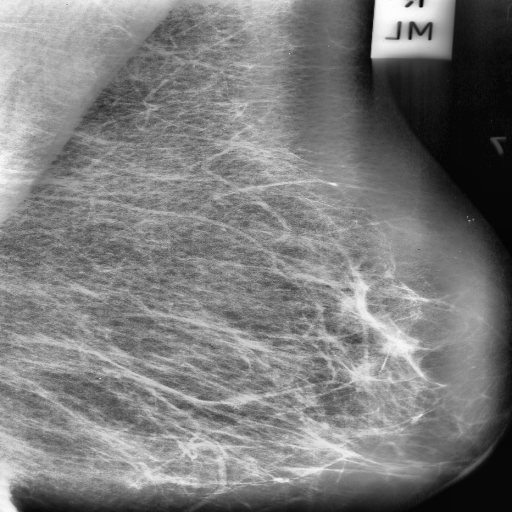

In [3]:
# Open image
image_path = os.path.join(os.getcwd(), 'images', 'mdb006.png')
image = Image.open(image_path).convert("RGB")
image

Función para ver dos imágenes lado a lado

In [5]:
import matplotlib.pyplot as plt

def display_images_side_by_side(original_image, filtered_image):

    # Display the images side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(original_image)
    axes[0].axis('off')  # Hide the axis
    axes[0].set_title('Imagen Original')

    axes[1].imshow(filtered_image)
    axes[1].axis('off')  # Hide the axis
    axes[1].set_title('Imagen Filtrada')

    plt.show()

## Edge Filter

In [4]:
# Filter image according to edge detection kernel
filtered = image.filter(ImageFilter.Kernel(
    size=(3, 3),
    kernel=[-1, -1, -1, -1, 8, -1, -1, -1, -1],
    scale=1
))

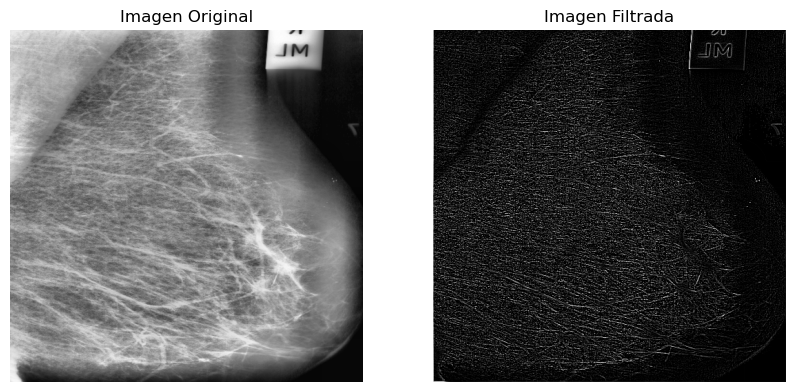

In [6]:
# Show resulting image
display_images_side_by_side(original_image=image, filtered_image=filtered)

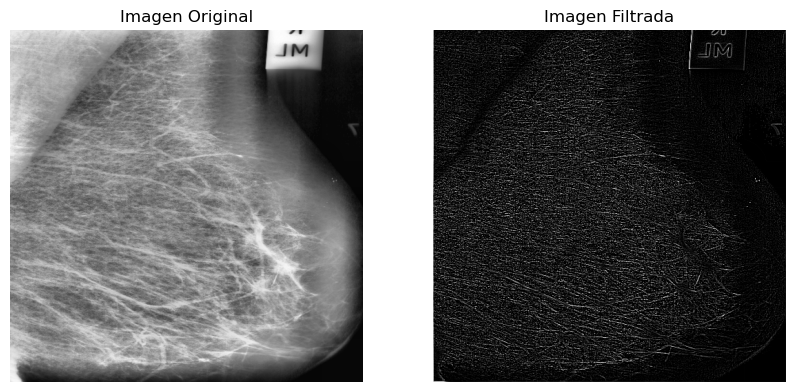

In [7]:
image_edge = image.filter(ImageFilter.FIND_EDGES)
display_images_side_by_side(image, image_edge)

Se observa que para la imagen de mamografía, el detector de bordes no encuentra el borde principal de la mama y sobre todo genera bordes de los diferentes tejidos que aparecen en la imagen. Es posible que para obtener un resultado más adecuado se requiera combinar el filtro con operaciones morfológicas o variaciones del filtro en sí para obtener mejores resultados. También, puede ser necesario un preprocesamiento de la imagen. En el caso de la inscripción de texto se observa que los bordes quedan bien definidos

## Filtros Consultados

Segun COPILOT las siguientes serían los valores que se tiene para los filtros solicitados. Sin embargo, en el caso de box_blur, el filtro se calcula por medio de un radio, por lo que es mejor calcular usando la librería directamente

In [19]:
# sharpen_kernel = [0,-1,0, -1, 5,-1, 0,-1,0]
# box_blur_kernel = [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9]
# emboss_kernel = [-2,-1,0, -1,1,1, 0,1,2]

## Sharpen

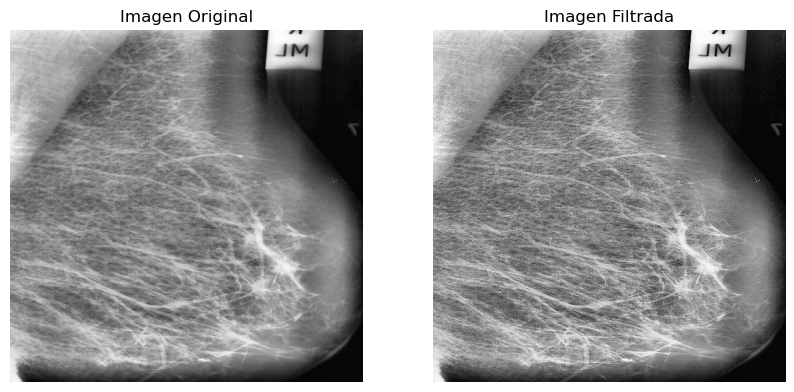

In [10]:
sharpen_image = image.filter(ImageFilter.SHARPEN)
display_images_side_by_side(image, sharpen_image)

Se observa una mayor definición de las características de la imagen usando SHARPEN

## BoxBlur
Se utiliza directamente el filgro que dispone PIL

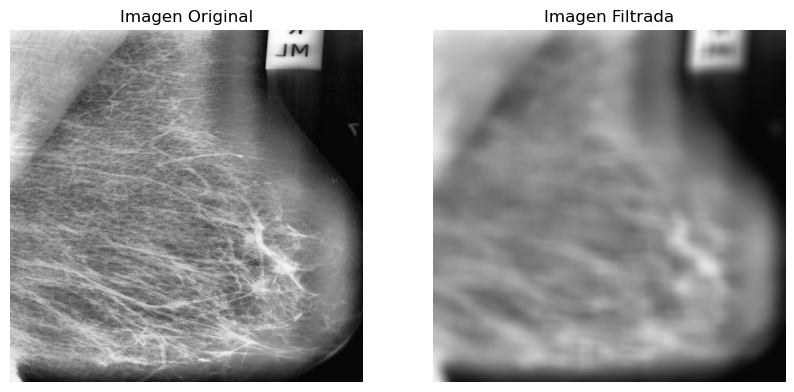

In [8]:
box_blur_image = image.filter(ImageFilter.BoxBlur(9))
display_images_side_by_side(image, box_blur_image)

Puede apreciarse que el filtro genera un desenfoque de la imagen

## Emboss

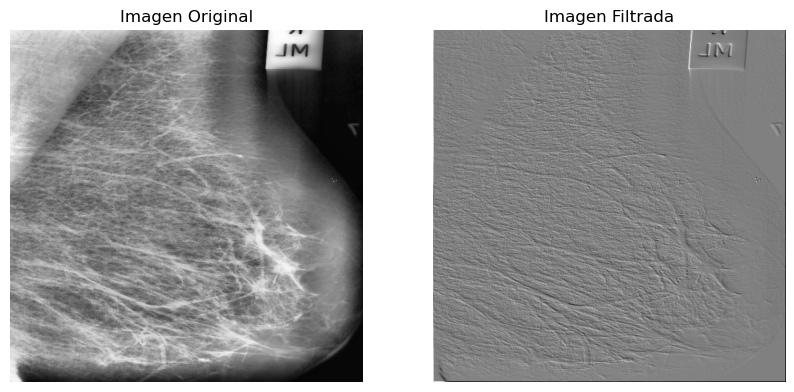

In [9]:
emboss_image = image.filter(ImageFilter.EMBOSS)
display_images_side_by_side(image, emboss_image)

En una imagen natural se puede observar que EMBOSS genera un relieve de la imagen. Sin embargo, en este caso, genera un relieve de características del tejido. No se observa una utilidad inmediata de este filtro con este tipo de imágenes. En el caso del texto se puede observar un mejor efecto del filtro.

## Median Filter

Este filtro se puede utilizar en imágenes médicas para reducir el ruido de la imagen y mantener la integridad de los bordes, por lo que sería adecuado como en una etapa de preprocesamiento

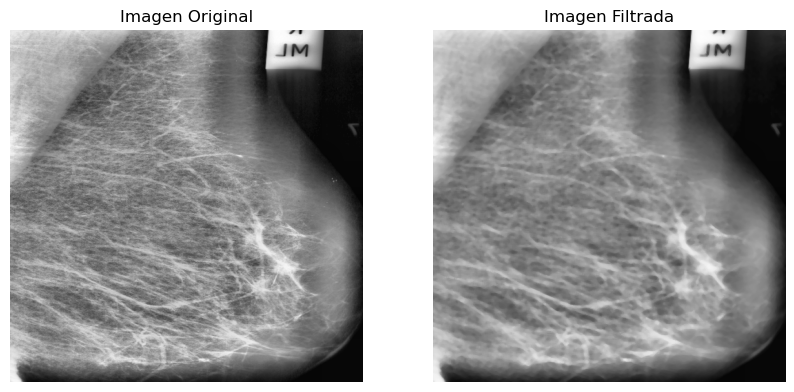

In [14]:
median_image = image.filter(ImageFilter.MedianFilter(size=5))
display_images_side_by_side(image, median_image)

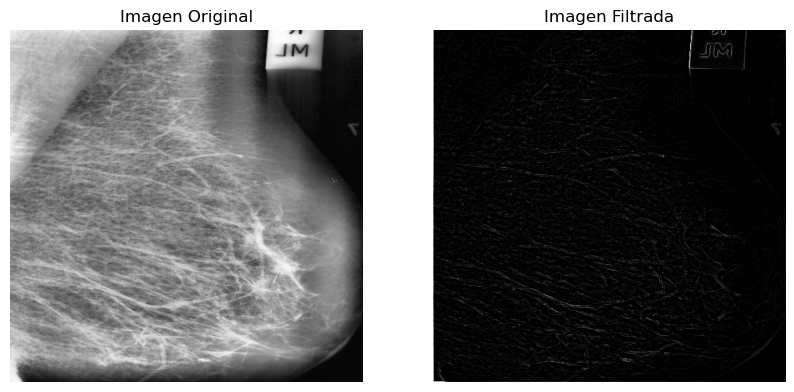

In [16]:
image_edge = median_image.filter(ImageFilter.FIND_EDGES)
display_images_side_by_side(image, image_edge)

Se observa que tras de utilizar el filtro de medios, el detector de bordes se comporta de manera diferente a cuando se aplica directo sobre la imagen, por lo que sí sería adecuado usar el filtro de medias para preprocesar las imágenes